In [102]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

sns.set(font_scale=1.5)

In [133]:
wine_review_df = pd.read_csv('../input/winemag-data-130k-v2.csv', index_col=0)
wine_review_df['variety'] = wine_review_df.variety.map(lambda v: str(v)[0:15])
wine_review_df['token_len'] = wine_review_df.description.map(lambda d: len(d.split()))

In [173]:
wine_review_df.shape

(129971, 15)

In [166]:
wine_review_df.country.isna().sum()

63

In [167]:
wine_review_df.price.isna().sum()

8996

In [168]:
wine_review_df.points.isna().sum()

0

In [175]:
wine_review_df.taster_twitter_handle.isna().sum()

31213

In [170]:
wine_review_df.title.isna().sum()

0

In [171]:
wine_review_df.variety.isna().sum()

0

In [172]:
wine_review_df.description.isna().sum()

0

In [134]:
wine_review_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,token_len
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,24
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,38
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,28
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,33
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,41


In [28]:
wine_review_df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery', 'token_len'],
      dtype='object')

In [29]:
wine_review_df.shape

(129971, 14)

In [30]:
wine_review_df.describe()

,points,price,token_len
count,129971.000000,120975.000000,129971.000000
mean,88.447138,35.363389,40.379615
std,3.039730,41.022218,11.111982
min,80.000000,4.000000,3.000000
25%,86.000000,17.000000,33.000000
50%,88.000000,25.000000,39.000000
75%,91.000000,42.000000,47.000000
max,100.000000,3300.000000,135.000000


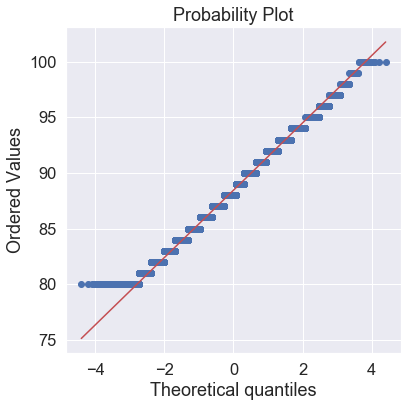

In [212]:
plt.subplots(figsize=(6, 6))

#sns.distplot(wine_review_df.points, kde=False);

measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(wine_review_df.points, dist="norm", plot=plt)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


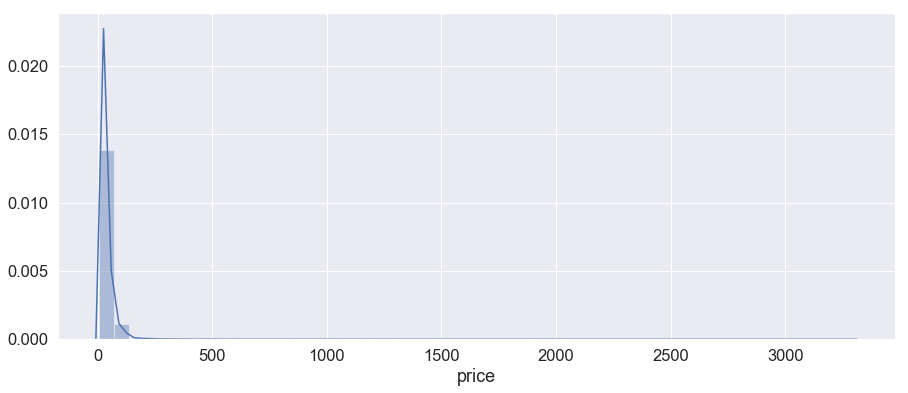

In [32]:
plt.subplots(figsize=(15, 6))

sns.distplot(wine_review_df.price.dropna())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'density (normalized)'), Text(0.5,0,'wine price')]

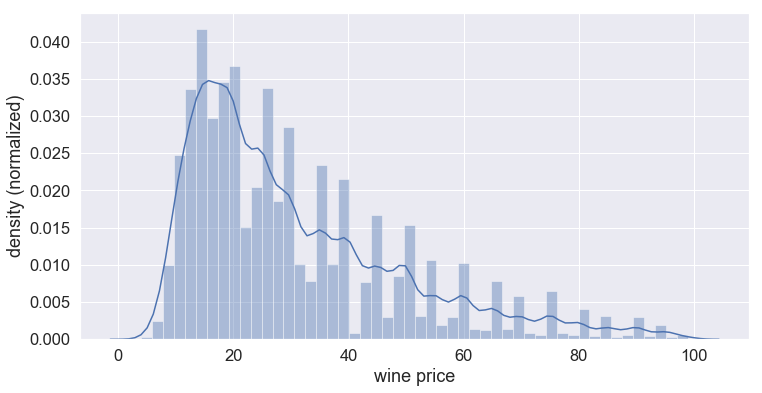

In [213]:
plt.subplots(figsize=(12, 6))

ax = sns.distplot(wine_review_df.price.dropna()[wine_review_df.price.dropna() < 100], kde=True)

ax.set(xlabel='wine price', ylabel='density (normalized)')

In [135]:
winery_count_df = pd.DataFrame(wine_review_df.winery.value_counts())
winery_count_df.describe()

,winery
count,16757.000000
mean,7.756221
std,12.762010
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,222.000000


In [136]:
variety_count_df = pd.DataFrame(wine_review_df.variety.value_counts())
variety_count_df.describe()

,variety
count,675.000000
mean,192.549630
std,1014.827697
min,1.000000
25%,2.000000
50%,6.000000
75%,30.000000
max,13272.000000


In [221]:
variety_count_df.index

Index(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvig', 'Red Blend',
       'Bordeaux-style ', 'Riesling', 'Sauvignon Blanc', 'Syrah', 'Rosé',
       'Merlot',
       ...
       'Ekigaïna', 'Mavrotragano', 'Shiraz-Roussann', 'Torontel', 'Xinisteri',
       'Bobal-Cabernet ', 'Thrapsathiri', 'Macabeo-Moscate', 'Tinto Velasco',
       'Colorino'],
      dtype='object', length=675)

In [137]:
variety_count_df_prime = variety_count_df.sort_values(by='variety', ascending=False).reset_index().reset_index()
variety_count_df_prime.head()

,level_0,index,variety
0,0,Pinot Noir,13272
1,1,Chardonnay,11753
2,2,Cabernet Sauvig,9829
3,3,Red Blend,8946
4,4,Bordeaux-style,7981


[Text(0,0.5,'number of reviews'), [], Text(0.5,0,'wine variety')]

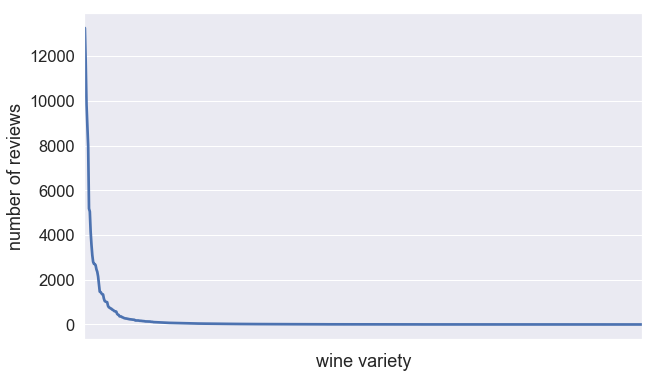

In [216]:
plt.subplots(figsize=(10, 6))

ax = sns.pointplot(x="level_0", 
                   y="variety", 
                   data=variety_count_df_prime, 
                   alpha=0.5, 
                   markers=["None"])

ax.set(xlabel='wine variety', ylabel='number of reviews', xticklabels=[])

In [189]:
top_variety_count_df = variety_count_df.sort_values(by='variety', ascending=False)[0:5]

In [219]:
variety_count_df.describe()

,variety
count,675.000000
mean,192.549630
std,1014.827697
min,1.000000
25%,2.000000
50%,6.000000
75%,30.000000
max,13272.000000


In [190]:
top_variety_count_df

,variety
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvig,9829
Red Blend,8946
Bordeaux-style,7981


In [191]:
top_variety_wine_review_df = wine_review_df.merge(top_variety_count_df, right_index=True, left_on='variety')

In [192]:
top_variety_wine_review_df.head()

,variety,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety_x,winery,token_len,has_black_cherry,variety_y
4,Pinot Noir,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,41,False,13272
21,Pinot Noir,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat,43,False,13272
25,Pinot Noir,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,38,False,13272
35,Pinot Noir,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,41,False,13272
41,Pinot Noir,US,"A stiff, tannic wine, this slowly opens and br...",NaN,86,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars,28,False,13272


In [193]:
top_variety_wine_review_df.variety.value_counts()

Pinot Noir         13272
Chardonnay         11753
Cabernet Sauvig     9829
Red Blend           8946
Bordeaux-style      7981
Name: variety, dtype: int64

[Text(0,0.5,'wine price (USD)'), Text(0.5,0,'wine variety')]

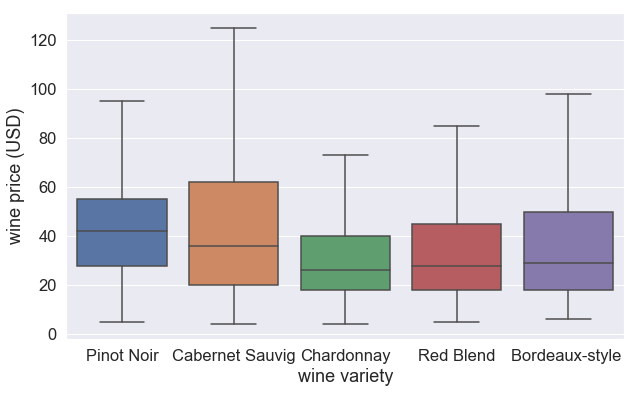

In [195]:
plt.subplots(figsize=(10, 6))

ax = sns.boxplot(x="variety", y="price",
            data=top_variety_wine_review_df, showfliers=False)

ax.set(xlabel='wine variety', ylabel='wine price (USD)')

[Text(0,0.5,'wine ratings'), Text(0.5,0,'wine variety')]

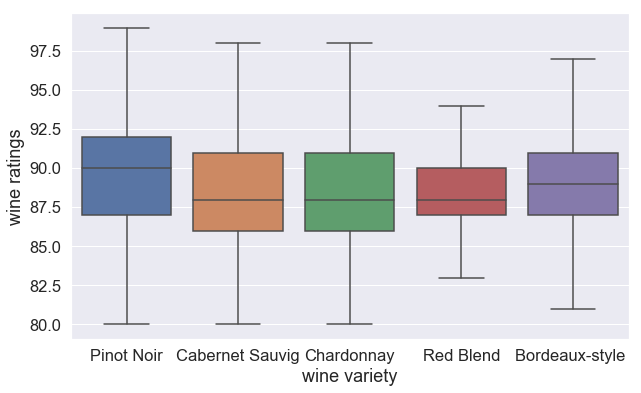

In [197]:
plt.subplots(figsize=(10, 6))

ax = sns.boxplot(x="variety", y="points",
            data=top_variety_wine_review_df, showfliers=False)

ax.set(xlabel='wine variety', ylabel='wine ratings')

In [47]:
country_count_df = pd.DataFrame(wine_review_df.country.value_counts())
country_count_df = country_count_df.sort_values(by='country', ascending=False)
country_count_df.head()

,country
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691


In [220]:
country_count_df.describe()

,country
count,43.000000
mean,3021.116279
std,9238.949755
min,1.000000
25%,12.000000
50%,86.000000
75%,1410.000000
max,54504.000000


[Text(0,0.5,'number of reviews'), [], Text(0.5,0,'wine country')]

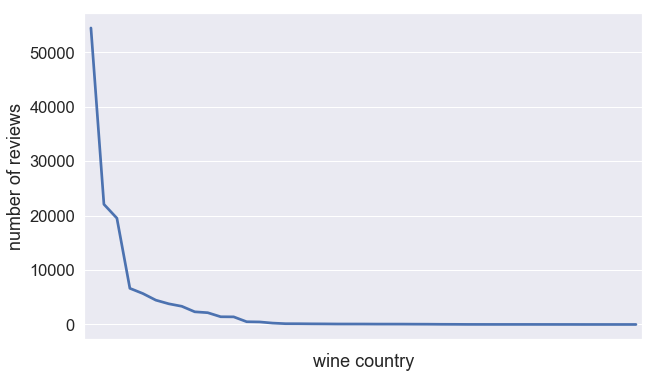

In [217]:
plt.subplots(figsize=(10, 6))

country_count_df_prime = country_count_df.reset_index().reset_index()
ax = sns.pointplot(x="level_0", 
                   y="country", 
                   data=country_count_df_prime, 
                   alpha=0.5, 
                   markers=["None"])

ax.set(xlabel='wine country', ylabel='number of reviews', xticklabels=[])

In [198]:
top_country_wine_review_df = wine_review_df.merge(country_count_df[0:5], left_on='country', right_index=True)
top_country_wine_review_df.head()

,country,country_x,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,token_len,has_black_cherry,country_y
0,Italy,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,24,False,19540
6,Italy,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,31,False,19540
13,Italy,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascale,Masseria Setteporte,37,False,19540
22,Italy,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,24,False,19540
24,Italy,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,30,True,19540


[Text(0,0.5,'wine price (USD)'), Text(0.5,0,'wine country')]

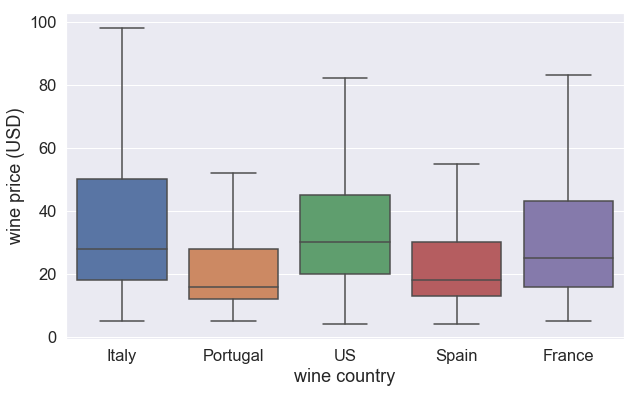

In [200]:
plt.subplots(figsize=(10, 6))

ax = sns.boxplot(x="country", y="price",
            data=top_country_wine_review_df, showfliers=False)

ax.set(xlabel='wine country', ylabel='wine price (USD)')

[Text(0,0.5,'wine ratings'), Text(0.5,0,'wine country')]

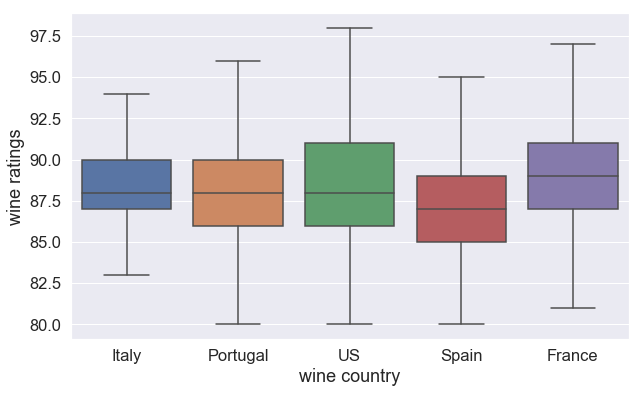

In [202]:
plt.subplots(figsize=(10, 6))

ax = sns.boxplot(x="country", y="points",
            data=top_country_wine_review_df, showfliers=False)

ax.set(xlabel='wine country', ylabel='wine ratings')

[Text(0,0.5,'wine price (USD)'), Text(0.5,0,'wine ratings')]

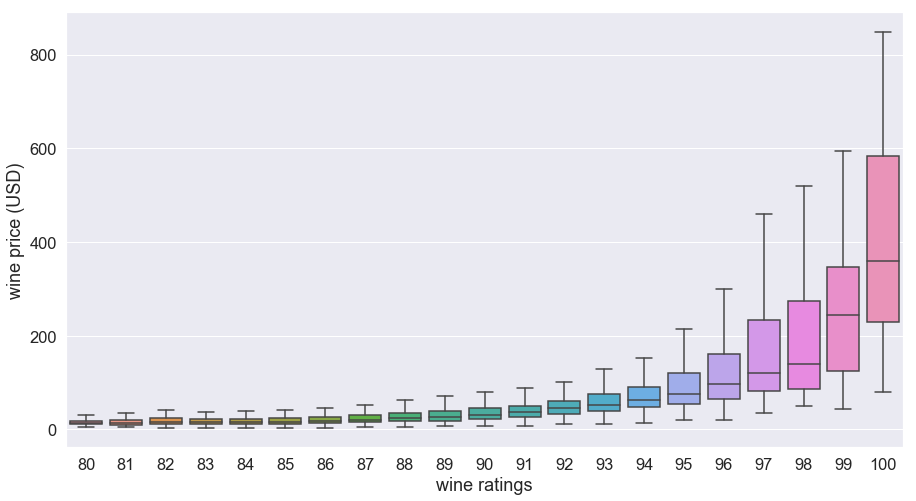

In [154]:
plt.subplots(figsize=(15, 8))

ax = sns.boxplot(x="points", y="price",
                 data=wine_review_df,
                  showfliers=False)

ax.set(xlabel='wine ratings', ylabel='wine price (USD)')

[Text(0,0.5,'number of words in wine review'), Text(0.5,0,'wine ratings')]

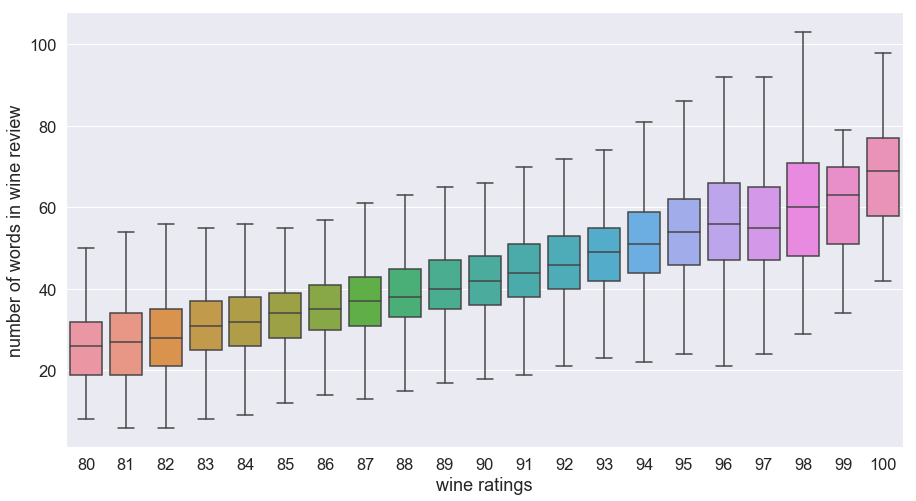

In [157]:
plt.subplots(figsize=(15, 8))

ax = sns.boxplot(x="points", y="token_len",
                     data=wine_review_df, showfliers=False)

ax.set(xlabel='wine ratings', ylabel='number of words in wine review')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'density (normalized)'),
 Text(0.5,0,'number of words in wine review')]

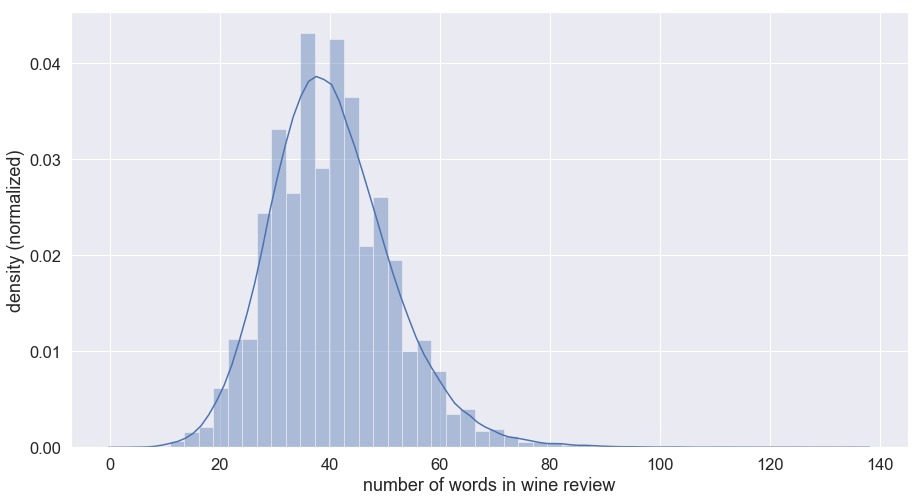

In [156]:
plt.subplots(figsize=(15, 8))
ax = sns.distplot(wine_review_df.token_len)

ax.set(xlabel='number of words in wine review', ylabel='density (normalized)')

(-0.5, 1439.5, 1079.5, -0.5)

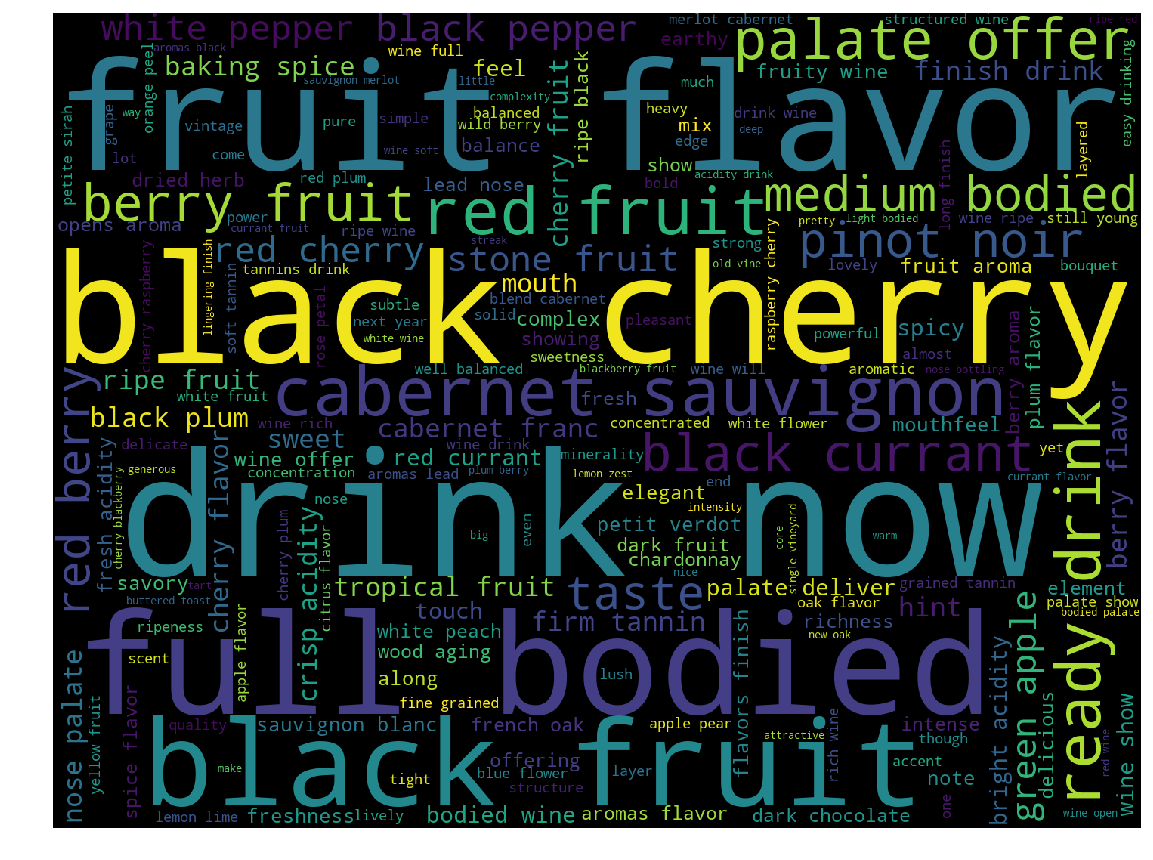

In [57]:
from wordcloud import WordCloud

cloud = WordCloud(width=1440, height=1080).generate(" ".join(wine_review_df.description.astype(str)).lower())
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [159]:
wine_review_df['has_black_cherry'] = wine_review_df.description.map(lambda d: 'black cherry' in d)

[Text(0,0.5,'wine price (USD)'),
 Text(0.5,0,'whether review text contains "black cherry"')]

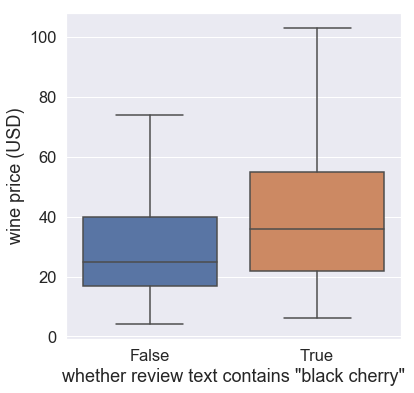

In [210]:
plt.subplots(figsize=(6, 6))

ax = sns.boxplot(x='has_black_cherry', y='price', showfliers=False, data=wine_review_df)

ax.set(xlabel='whether review text contains "black cherry"', ylabel='wine price (USD)')

[Text(0,0.5,'wine ratings'),
 Text(0.5,0,'whether review text contains "black cherry"')]

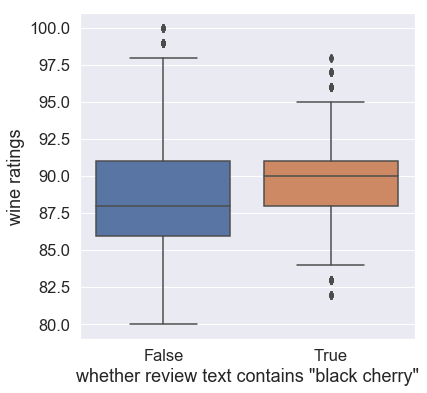

In [211]:
plt.subplots(figsize=(6, 6))

ax = sns.boxplot(x='has_black_cherry', y='points', data=wine_review_df)

ax.set(xlabel='whether review text contains "black cherry"', ylabel='wine ratings')

In [120]:
taster_count_df = pd.DataFrame(wine_review_df.taster_twitter_handle.value_counts())
taster_count_df = taster_count_df.sort_values(by='taster_twitter_handle', ascending=False)[0:5]
taster_count_df.head()

,taster_twitter_handle
@vossroger,25514
@wineschach,15134
@kerinokeefe,10776
@vboone,9537
@paulgwine,9532


In [226]:
taster_count_df = pd.DataFrame(wine_review_df.taster_twitter_handle.value_counts())

In [227]:
taster_count_df.describe()

,taster_twitter_handle
count,15.000000
mean,6583.866667
std,6842.916044
min,6.000000
25%,1460.000000
50%,4966.000000
75%,9534.500000
max,25514.000000


In [117]:
taster_count_df.shape

(15, 1)

[Text(0,0.5,'wine ratings'), Text(0.5,0,'wine taster')]

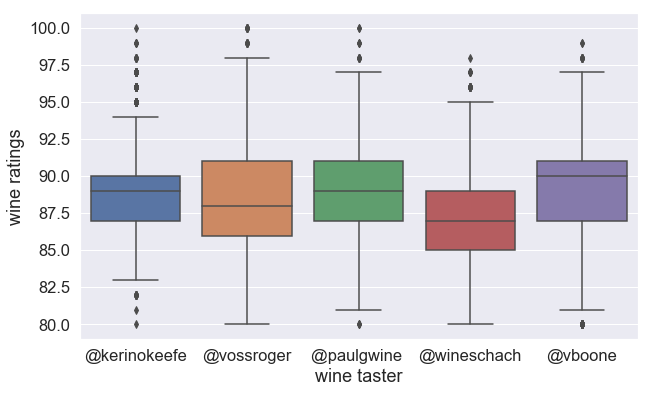

In [225]:
wine_review_taster_df = wine_review_df.merge(taster_count_df, left_on='taster_twitter_handle', right_index=True)

plt.subplots(figsize=(10, 6))

ax = sns.boxplot(x="taster_twitter_handle", y="points",
            data=wine_review_taster_df, showfliers=True)

ax.set(xlabel='wine taster', ylabel='wine ratings')